# Module 02_01: DBSCAN Algorithm Using Intel® Extension for Scikit-learn*

![Assets/dbscan.jpg](Assets/dbscan.jpg)

<a id='Back-to-Sections'></a>


You will review, modify and execute code for unsupervised clustering of data using Intel Extension for Scikit-learn for clustering on a single CPU



## Learning Objectives

* Describe the value of Intel® Extension for Scikit-learn methodology in extending scikit-learn optimzation capabilites
* Name key imports and function calls to use Intel Extension for Scikit-learn to target DBSCAN
* Build a Sklearn implementation of DBSCAN targeting CPU using patching
* Apply patching with dynamic versus lexical scope approaches 

# Intel Extension for Scikit-learn

Intel® Extension for Scikit-learn contains drop-in replacement patching functionality for the Scikit-learn machine learning library for Python. The patches were originally available in the daal4py package. All future updates for the patching will be available only in Intel Extension for Scikit-learn. All performance claims obtained using daal4py are applicable for Intel Extension for Scikit-learn.

The value of the patch is providing optimized versions of common Scikit-learn machine learning algorithms used for data science. An added value is the ability to invoke these functions on either CPU or GPU.

Applying Intel(R) Extension for Scikit-learn will impact the following existing [scikit-learn algorithms:](https://intel.github.io/scikit-learn-intelex/algorithms.html)

You can take advantage of the optimizations of Intel Extension for Scikit-learn by adding just two lines of code before the usual Scikit-learn imports:

 - from sklearnex import patch_sklearn
 - patch_sklearn()
 - ...
 - from sklearn.cluster import DBSCAN
 - ... import other sklearn algoritms as needed ...

Intel Extension for Scikit-learn uses Intel® oneAPI Data Analytics Library (oneDAL) to achieve its acceleration. The optimizations aim for the efficient use of CPU resources. The library enables all the latest vector instructions, such as Intel® Advanced Vector Extensions (Intel AVX-512). It also uses cache-friendly data blocking, fast Basic Linear Algebra Subprograms (BLAS) operations with Intel OneAPI Math Kernel Library (oneMKL), scalable multi-threading with Intel oneAPI Thread Building Blocks (oneTBB) library, and more.

# DBSCAN Algorithm
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm used to identify clusters of points in a data set based on the density of the points. It uses two parameters, Epsilon and MinPts, to define clusters. Epsilon determines the maximum distance between two points for them to be considered in the same cluster and MinPts determines the minimum number of points required to form a cluster. DBSCAN starts by randomly selecting a point in the data set and then looking at the Epsilon neighborhood of the point. It then identifies whether the neighborhood is dense enough to form a cluster. If it is, it adds the point to the cluster and continues to search the Epsilon neighborhood of the points in the cluster until no more points can be added. If a point is not part of a dense neighborhood, it is marked as noise. The algorithm is used in a variety of applications including anomaly detection, document clustering, and image segmentation.


- [Back to Sections](#Back-to-Sections)

### About the data
The data included in these exercises was built seperately using the **sklearn.datasets make_blobs** function which synthesizes data for analysis by specifying: 
 - The number of samples in the dataset called n_samples, for example n_sample = 200000
 - The number of columns in the dataset called n_features, for exmaple n_features = 50,
 - The number of cluster centers called centers, for example centers = 10, 
 - The standard deviation for each cluster called cluster_std, for example cluster_std = 0.2,
 - The spatial range over which the clusters range, called center_box for example center_box = (-10.0, 10.0), 
 - A seed called random_state, for example random_state = 777
 

 ## Exercise - Experiment with placement of patch:
 
 - Apply patching method to ensure that the code uses the optimized DBSCAN from Intel Extensions for scikit-learn*
```python
from sklearnex import patch_sklearn, unpatch_sklearn
patch_sklearn()  
```
.

 - Apply patching both within the compute_fit_predict function scope and alternatively: outside the scope of this function. Does patching work in either case? Experiment with lexical versus dynamic extentent of where patch is applied
 - Ensure one DBSCAN cell is patched, and the other is unpatched

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


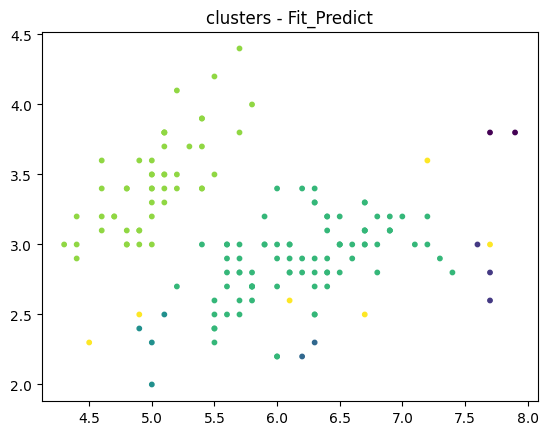

In [1]:
# functions of interest DBSCAN.fit_predict which return ndArray
# This cell is running in interactive mode on Jupyter
# This allows the leaner to experiment and play


import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

def compute_fit_predict():
    import numpy as np
    import os

    ### Apply patch here alternative 1 ######

    #########################################


    #from sklearn.cluster import KMeans
    from sklearn.cluster import DBSCAN

    #infile = os.path.join('data', 'batch', 'kmeans_dense.csv')
    nCentroids = 3

    iris = datasets.load_iris()
    columns = iris.feature_names
    data = iris.data
    
    ### Apply patch here alternative 2, did this work? ######

    #########################################
    clustering = DBSCAN(eps=.5, min_samples=2).fit_predict(data)
    #kmeans = KMeans(nCentroids, init='random', random_state=0)

    #labels = pd.DataFrame( kmeans.fit(data), columns = ['labels'] )
    irisDf = pd.DataFrame(data)
    clusteringDf = pd.DataFrame(clustering)
    df = pd.concat([irisDf, clusteringDf], axis = 1)
    df.columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Cluster']    
    df.to_csv('clusters.csv', index=False)

### Apply patch here alternative 3 #############################################
### question if patch is applied here - is it applied BEFORE the import DBSCAN?
from sklearnex import patch_sklearn, unpatch_sklearn
patch_sklearn()
################################################################################

compute_fit_predict()
clusters = pd.read_csv('clusters.csv')
plt.title('clusters - Fit_Predict')
plt.scatter(clusters['SepalLength'], clusters['SepalWidth'], s=10, c=clusters['Cluster'], cmap='viridis_r')
plt.show()


## Key learning
Patching BEFORE the import implies the dynamic scoping - meaning that the it is applied and a thread of execution encounters the statements

So even though, is lexically before the patch (lexically -  as a human would read the code from top to bottom)

the patch get applied - because as an execution of code (thread) perspective, the patch is applied, then the function is called and then the import for DBSCAN occurs


def compute_fit_predict():
...
...from sklearn.cluster import DBSCAN
...
path_sklearn()
compute_fit_predict()

# Exercise: Apply UNpatch

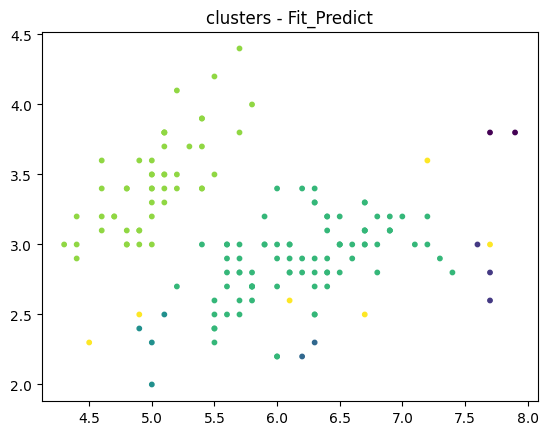

In [2]:
# functions of interest DBSCAN.fit_predict which return ndArray
# This cell is running in interactive mode on Jupyter
# This allows the leaner to experiment and play


import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

def compute_fit_predict():
    import numpy as np
    import os

    ### Apply patch here alternative 1 ######

    #########################################


    #from sklearn.cluster import DBSCAN
    from sklearn.cluster import DBSCAN

    #infile = os.path.join('data', 'batch', 'DBSCAN_dense.csv')
    nCentroids = 3

    iris = datasets.load_iris()
    columns = iris.feature_names
    data = iris.data
    
    ### Apply patch here alternative 2, did this work? ######

    #########################################
    clustering = DBSCAN(eps=.5, min_samples=2).fit_predict(data)
    #kmeans = KMeans(nCentroids, init='random', random_state=0)

    #labels = pd.DataFrame( kmeans.fit(data), columns = ['labels'] )
    irisDf = pd.DataFrame(data)
    clusteringDf = pd.DataFrame(clustering)
    df = pd.concat([irisDf, clusteringDf], axis = 1)
    df.columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Cluster']    
    df.to_csv('clusters.csv', index=False)

### Apply patch here alternative 3 #############################################
### question if patch is applied here - is it applied BEFORE the import DBSCAN?
from sklearnex import patch_sklearn, unpatch_sklearn
unpatch_sklearn()
################################################################################

compute_fit_predict()
clusters = pd.read_csv('clusters.csv')
plt.title('clusters - Fit_Predict')
plt.scatter(clusters['SepalLength'], clusters['SepalWidth'], s=10, c=clusters['Cluster'], cmap='viridis_r')
plt.show()


## Summary
In this module you will have learned the following:
* Able to Name key imports and function calls to use Intel Extension for Scikit-learn to target DBSCAN for use on CPU

# Notices & Disclaimers 

Intel technologies may require enabled hardware, software or service activation.
No product or component can be absolutely secure.

Your costs and results may vary.

© Intel Corporation. Intel, the Intel logo, and other Intel marks are trademarks of Intel Corporation or its subsidiaries. 
*Other names and brands may be claimed as the property of others.

In [3]:
print("All Done")

All Done
